<a href="https://colab.research.google.com/github/Said-Abdullahi/-Machine-Learning-Projects/blob/main/SIT720_Children%E2%80%99s_Disability_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#  Name:Said Abdullahi
#  SIT720:  Assessment Task 2: Problem solving task
#  Student ID: 221377847
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

**SIT720 Machine Learning:Assessment Task 2: Problem solving task.**

Datafile: Download the dataset (SCADI.csv) from the [link](https://archive.ics.uci.edu/ml/datasets/SCADI).

Data Description: This dataset contains 206 attributes of 70 children with physical and motor disability based on ICF-CY.
 For more information click this  [link](https://www.mdpi.com/2073-8994/11/1/89/html).

Datafile:  Download the dataset (heartdisease.csv). The description of the attributes and download of the dataset can be found in this article from the [link](http://archive.ics.uci.edu/ml/datasets/Heart+Disease).


In [ ]:
#install package
!pip install --upgrade kneed
!pip install pyclustering

# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn import metrics
from pyclustering.utils.metric import distance_metric, type_metric
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from sklearn.cluster import KMeans
from pyclustering.cluster.kmeans import kmeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

## 1.Determine the number of subgroups from the dataset using attributes 3 to 205 i.e., excluse attributes 1, 2 and 206. Is this number same as number of classes presented by attribute 206? Explain and justify your findings. (4 marks)


> # Upload the dataset

In [ ]:
# Uploads and read the data into a pandas DataFrame.
data_file_SCADI ='/content/SCADI.csv'
data_file_heartdisease ='/content/heartdisease.csv'

#function to read the data into a pandas DataFrame.
def upload_data(data_file):
    '''
    Uploads the data into a pandas DataFrame.
    '''
    #Making a list of missing value types
    missing_values = ["null", "nan", "?", "N/A", "na", "n/a", "", " "]
    df=pd.read_csv(data_file, na_values=missing_values)
    return df
#end of function

# =====================================================================
# function start_pipeline to call all the functions and return a copy the datadf
def start_pipeline(df):
    return df.copy()
#end of function

#function to dropna values from the dataframe
def drop_na(df):
    '''
    Drop the rows with missing values.
    '''
    df.dropna(inplace=True)
    return df

In [ ]:
# upload and the SCADI data files into a pandas DataFrame.
df= upload_data(data_file_SCADI)
df.name = 'df'
df=(upload_data(data_file_SCADI)
                            .pipe(start_pipeline)
                            .pipe(drop_na)
)
df.name = 'df'

> ## Seperating Feature and Target Data Function





In [ ]:
def  get_feature_and_target(df, feature_column,target_column):
    '''
    Separate the features and target.
    '''
    # Separate the features and target

    feature = feature_column
    target = target_column
    return feature, target
#end of function

## Getting the SCADI Features and Target/Class Data

In [ ]:
#initialize the feature and target columns needed
feature_column=df.iloc[:, 2:205]
target_column=df['Classes']

#upload data containing a separate the features and target
SCADI_features,SCADI_target=(df.pipe(start_pipeline)
                            .pipe(get_feature_and_target, feature_column, target_column)
)
SCADI_features.name = 'SCADI_features'
SCADI_target.name = 'SCADI_target'


## Displaying head,shape of the SCADI , feature and target datasets

In [ ]:
#fumction to display all the data head, tail, shape, and describe
def display_data(df):
    '''
    Display the data head, tail, shape, and describe.
    '''
    # Display the data head, tail, shape, and describe
    print('#'*100)
    print("Displaying=>{} dataset".format(df.name))
    print('#'*100)
    print('head:')
    print(df.head(1))
    print('#'*100)
    print('Shape:')
    print(df.shape)
    print('#'*100)

    #end of function
#use the function to display the data
display_data(df)
display_data(SCADI_features)
display_data(SCADI_target)

> Getting the number different and distinct Target Classes

In [ ]:
#function get_unique_values to get the unique values of the target column with optional parameter

def get_unique_values(df, column=None):
    '''
    Get the unique values of the target column.
    '''
    if column is None:
        unique_values = df.unique()
    else:
        unique_values = df[column].unique()
    return unique_values
#end of function

#get the unique values of the target column
unique_target_classes=get_unique_values(SCADI_target)
print(unique_target_classes)

['class6' 'class2' 'class4' 'class7' 'class1' 'class5' 'class3']


# Plot the data

The clasess are imbalanced, therefore if we balanced it may improve our model


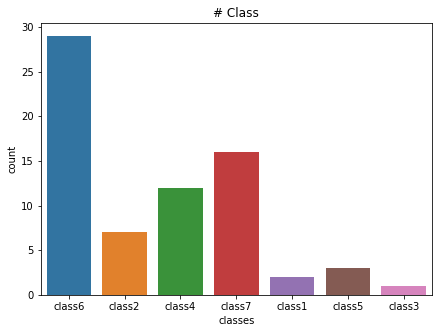

In [ ]:
#function plot countplot(x='Classes', data=df) to see the distribution of the target classes
def plot_target_classes(x='Classes', data=df):
    '''
    Plot the countplot(x='Classes', data=df)
    '''
    import seaborn as sns
    import matplotlib.pyplot as plt
    # Plot the class
    f, ax = plt.subplots(figsize=(7, 5))
    sns.countplot(x='Classes', data=df)
    plt.title('# Class')
    plt.xlabel('classes')
    return
#end of function


#plot_target_classes to plot the target classes
plot_target_classes(x='Classes', data=df)

print('The clasess are imbalanced, therefore if we balanced it may improve our model')

# Scaled SCADI features for modelling

In [ ]:
# get column names for features
cols = [i for i in SCADI_features.columns]

# feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(SCADI_features)

# convert back to dataframe
scaled_SCADI_features = pd.DataFrame(scaled_features, columns=cols)

# Kmeans clustering model and Elbow Plot

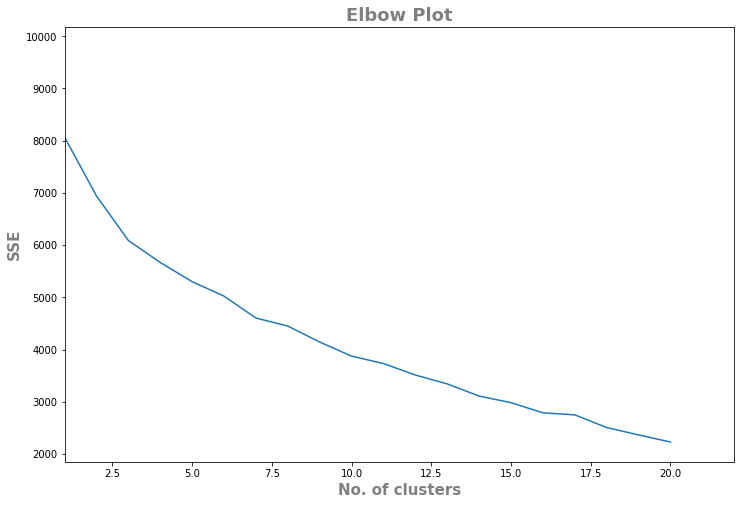

In [ ]:
#Kmean model
distortions = []
K = range(1,22)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_SCADI_features)
    distortions.append(kmeanModel.inertia_)

# plot the elbow graph
plt.figure(figsize=(12,8))
plt.title('Elbow Plot', color='gray', fontsize=18, fontweight='bold')
plt.plot(distortions)
plt.xlabel('No. of clusters', color='gray', fontsize=15, fontweight='bold')
plt.ylabel('SSE', color='gray', fontsize=15, fontweight='bold')
plt.xlim([1,22])
plt.show()

# Optimal kmeans cluster

In [ ]:
from kneed import KneeLocator # used for finding the optimal value of k
# find optimal value of k
k = KneeLocator(range(1,22), distortions, curve='convex', direction='decreasing')
print(f'Optimal value of k is {k.elbow}.')
print('*'*70)
print(f'We have {len(unique_target_classes)} classes and the optimal clusters is {k.elbow}')

Optimal value of k is 8.
**********************************************************************
We have 7 classes and the optimal clusters is 8


## Is this number same as number of classes presented by attribute 206? Explain and justify your findings. In other words is the optimal cluster value the same as the number of classes/target. (See for answer below)

SCADI dataset classes:

1. Caring for body parts problem
2. Toileting problem
3. Dressing problem
4. Washing oneself and caring for body parts and dressing problem
5. Washing oneself, caring for body parts, toileting and dressing problem
6. Eating, Drinking, washing oneself, caring for body parts, toileting, dressing,
looking after one’s health and looking after one’s safety problem
7. No Problem

SCADI dataset has 7 classes, and we get smaller optimal clusters. It is not the same. The justification for the difference might be that two of the classes might be closely related and thus grouped together. It could also be that one of the classes is being grouped into different clusters. For example, class 5 can be divided into different groups.

## 2. For the dataset (SCADI.csv), perform PCA.


## a. plot the captured variance with respect to increasing latent dimensionality. (2.5 marks)

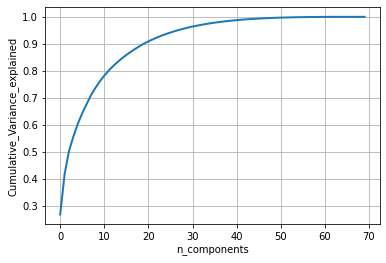

In [ ]:
#Import PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca=PCA()
pca.n_components=70
pca_data=pca.fit_transform(SCADI_features, SCADI_target)
percentage_var_explained = pca.explained_variance_ratio_;
cum_var_explained=np.cumsum(percentage_var_explained)
#plot PCA
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_Variance_explained')
plt.show()

## i. at least 89% variance?

In [ ]:
#The minimum dimensions captures 89% variance
pca=PCA(0.89)
pca.fit(SCADI_features, SCADI_target)
print('Number of components to explain 89% Variance is',pca.n_components_)

Number of components to explain 89% Variance is 19


## ii. at least 99% variance?

In [ ]:
#The minimum dimensions captures 99% variance
pca=PCA(0.99)
pca.fit(SCADI_features, SCADI_target)
print('Number of components to explain 99% Variance is',pca.n_components_)

Number of components to explain 99% Variance is 43


3. Determine the purity of clusters formed by the number of principal components which captured 89% and 99% variances respectively. Plot a line graph of the purity scores against the captured variances. Discuss your findings. (7.5 marks)

In [ ]:
# no of componetent and its variances stored
variances = []
varlist_89 = []
varlist_99 = []

# Create variance list
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
for component, variance in enumerate(cumulative_variance.tolist()):
    variances.append((component+1, variance))
    if variance >= 0.89:
        varlist_89.append((component+1, variance)) # +1 because first component is 0
    if variance >=0.99:
        varlist_99.append((component+1, variance))
    else:
        continue

# Create function for kmean and purity scores
def get_kmeans_purity(features, target, n_component):
    # principal component
    pca  = PCA(n_components=n_component)
    pca = pca.fit_transform(features,target)
    # column names
    cols = ['component_'+ str(i) for i in range(1, n_component+1)]
    pca_df = pd.DataFrame(pca, columns=cols)
    print(f'PCA dataframe for {n_component} components:\n{pca_df}')

    # purity scores
    purity_scores = []

    # kmeans cluster of 1 to 40
    for i in range(1,41):
        kmeans = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, random_state=100)
        kmeans.fit(pca_df)
        cluster = kmeans.labels_
        # purity function
        def purity_score(target, cluster):
            # confusion matrix
            confusion_matrix = metrics.cluster.contingency_matrix(target, cluster)

            return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)
        purity = purity_score(target, cluster)
        purity_scores.append((i, purity))
    return purity_scores

In [ ]:
# no of components and purity with cluster for 89% variance
purity_89 = get_kmeans_purity(SCADI_features, SCADI_target, varlist_89[0][0])
print(purity_89)
print('Variance of 89%')
for cluster, purity in purity_89:
    print(f'Cluster {cluster}: Purity is {purity:.2f}')

In [ ]:
# no of components and purity with cluster for 99% variance
purity_99 = get_kmeans_purity(SCADI_features, SCADI_target, varlist_99[0][0])
print(purity_99)
print('Variance of 99%')
for cluster, purity in purity_99:
    print(f'Cluster {cluster}: Purity is {purity:.2f}')

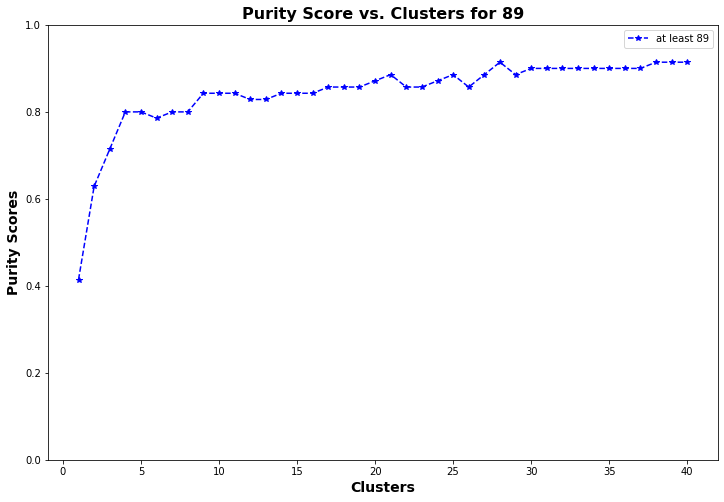

In [ ]:
# plot graph for variance of at least 89%
plt.figure(figsize=(12,8))
plt.title('Purity Score vs. Clusters for 89', fontsize=16, fontweight='bold')
plt.xlabel('Clusters', fontsize=14, fontweight='bold')
plt.ylabel('Purity Scores', fontsize=14, fontweight='bold')
plt.plot([i[0] for i in purity_89], [i[1] for i in purity_89], marker='*', color='blue', label='at least 89',  linestyle='--')
plt.ylim([0,1])
plt.legend()
plt.show()


Discussion: At 89% variance the purity is increasing from 1 to about 5 clusters and than it is increase at a diminishing rate. From 30 cluster there is no increase in purity score.

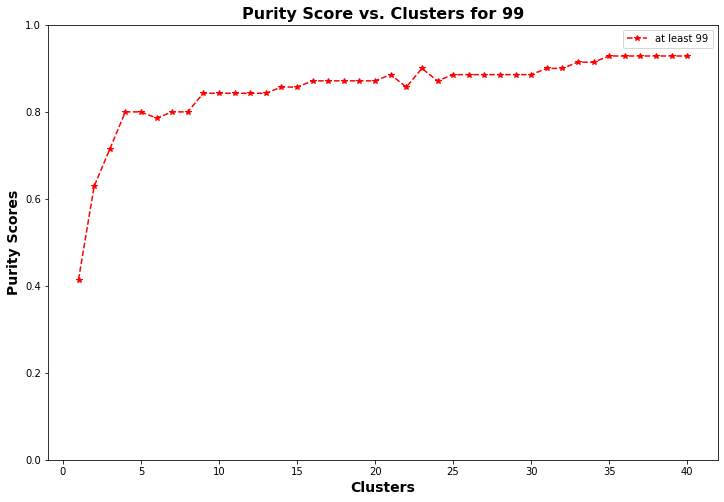

In [ ]:
# plot graph for variance of at least 99%
plt.figure(figsize=(12,8))
plt.title('Purity Score vs. Clusters for 99', fontsize=16, fontweight='bold')
plt.xlabel('Clusters', fontsize=14, fontweight='bold')
plt.ylabel('Purity Scores', fontsize=14, fontweight='bold')
plt.plot([i[0] for i in purity_99], [i[1] for i in purity_99], marker='*', color='red', label='at least 99', linestyle='--')
plt.ylim([0,1])
plt.legend()
plt.show()

Discussion: At 99% variance the purity scores seem similar. however it get flat later at 35 clusters.

## 4. Let's assume you have two datasets one is linear, and another is curved structural data.
## a. Can we apply PCA on these datasets? Justify your answer. (2.5 marks) (See for answer below)

PCA is used on linear datasets only. PCA does a linear transformation on the features where it tries to maximise variance among the linear combinations. However, for curved structural datasets (non-linear) it may not be wise to use PCA. There is other techniques like Kernel Principal Components, Isometric feature mapping, local linear embedding, and local multi-dimensional Scaling (MDS)

see: https://scikit-learn.org/stable/modules/decomposition.html

see: https://scikit-learn.org/stable/modules/manifold.html

# 5. Download the attached heartdisease.csv file. Read the file and separate the class and feature matrix. (2 marks)

> # Upload the dataset

In [ ]:
#function to dropna values from the dataframe
def drop_na(df):
    '''
    Drop the rows with missing values.
    '''
    df.dropna(inplace=True)
    return df

In [ ]:

#upload data containing full dataset and dropna values
print("uploading data from {}".format(data_file_heartdisease))
df_heart=(upload_data(data_file_heartdisease )
    .pipe(drop_na)
        )
df_heart.name = 'df_heart'

uploading data from /content/heartdisease.csv


## Seperating Feature and Target Data Function

In [ ]:
#initialize the feature and target columns needed
heart_features_column = df_heart.drop('num', axis=1)
heart_target_column = df_heart['num']



#upload data containing a separate the features and target
heart_features,heart_target=(df_heart.pipe(start_pipeline)
                            .pipe(get_feature_and_target, heart_features_column, heart_target_column)
)

heart_features.name = 'heart_features'
heart_target.name = 'heart_target'

## Getting the HEART Features and HEART Target/Class Data

In [ ]:
#display the data
display_data(df_heart)
display_data(heart_features)
display_data(heart_target)

## Plot the data

The clasess are imbalanced, therefore if we balance data it may improve our model


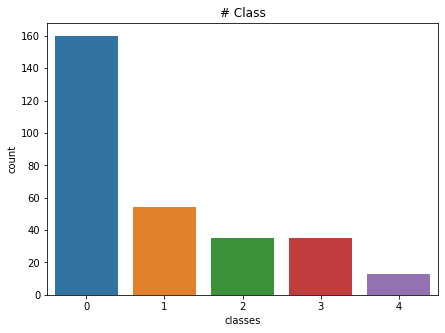

In [ ]:
#function plot countplot(x='Classes', data=df) to see the distribution of the target classes
def plot_target_classes(x='num', data=df_heart):
    '''
    Plot the countplot(x='num', data=df_heart)
    '''
    import seaborn as sns
    import matplotlib.pyplot as plt
    # Plot the class
    f, ax = plt.subplots(figsize=(7, 5))
    sns.countplot(x='num', data=df_heart)
    plt.title('# Class')
    plt.xlabel('classes')
    return
#end of function


#plot_target_classes
plot_target_classes(x='num', data=df_heart)

print('The clasess are imbalanced, therefore if we balance data it may improve our model')

In [ ]:
# The class has an imbalance
# We group 1,2,3,4 together, so we only have two classes
heart_target_2 = heart_target.replace([2, 3, 4], 1)
print('The classes are:\n', heart_target_2.unique())

The classes are:
 [0 1]


6. Determine the number of clusters from the dataset. Is this same as the actual number of classes in the dataset? (1 marks)

## Scaled feature

In [ ]:

# check unique class
unique_heart = df_heart['num'].unique()

# get column names for features
cols = [i for i in heart_features.columns]

# Function for scaling features

def scale(features):

    scaler = MinMaxScaler()
    features = scaler.fit_transform(heart_features)
    return features

# scale features
scaled_features = scale(heart_features)

# convert back to dataframe
heart_features = pd.DataFrame(scaled_features, columns=cols)

## Kmeans clustering and optimal cluster

In [ ]:
#function to find the optimal k value for kmeans
def find_optimal_k(scaled_features,target):
    '''
    Find the optimal k value for kmeans.
    '''

    distortions = []
    # Create a KMeans model with 2 clusters
    from sklearn.cluster import KMeans
    #create a loop of kmeans = KMeans(n_clusters=i)

    for k in range(2,21):
        kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=200, random_state=100)
        # Fit the model using the scaled features
        kmeans.fit(scaled_features)

        # Append the sum of squared distances of samples to their closest cluster center.
        distortions.append(kmeans.inertia_)


    return distortions
#end of function

#function to return the optimal k value using kneed package
def find_optimal_k_kneed(distortions):
    '''
    Find the optimal k value for kmeans.
    '''
    # Create a Knee Curve

    from kneed import KneeLocator # used for finding the optimal value of k
    # Create a KneeLocator object
    kn = KneeLocator(range(2,21), distortions, curve='convex', direction='decreasing')
    # Return the optimal K
    return kn
#end of function

## Is this same as the actual number of classes in the dataset?

In [ ]:
#use the find optimal and kneed function to get the optimal k value
distortions = find_optimal_k(scaled_features,heart_target)

#use the function to get the optimal k value
optimal_k = find_optimal_k_kneed(distortions)

#########################################################################################################################################################################

# Comparing target class of class=[1,2,3,4] and balanced class=[0,1]
heart_target.name='heart_target'
heart_target_2.name='heart_target_2'
print('heart_target=>original class=[1,2,3,4]'*1)
print('heart_target_2=>balanced class=[0,1]')
print('*'*70)
for target_item in [heart_target,heart_target_2]:
    if optimal_k.elbow == len(target_item.unique()):
        print(f'class:{target_item.name}       The optimal value of k is {optimal_k.elbow} which is the same as the number of classes of {len(target_item.unique())}')
    elif optimal_k.elbow > len(target_item.unique()):
        print(f'class:{target_item.name} The optimal value of k is {optimal_k.elbow} which is more than the number of classes of {len(target_item.unique())}')
    else:
        print(f'class:{target_item.name} The optimal value of k is {optimal_k.elbow} which is less than the number of classes of {len(target_item.unique())}')

heart_target=>original class=[1,2,3,4]
heart_target_2=>balanced class=[0,1]
**********************************************************************
class:heart_target The optimal value of k is 9 which is more than the number of classes of 5
class:heart_target_2 The optimal value of k is 9 which is more than the number of classes of 2


7. Perform K-Means clustering on the complete dataset and report purity score. (2 marks)

In [ ]:
from sklearn import metrics
from pyclustering.cluster.kmeans import kmeans
from sklearn.cluster import KMeans
#Kmeans
kmeanModel = KMeans(n_clusters=9, init='random', n_init=10, max_iter=200, random_state=100)
kmeanModel.fit(heart_features)
clusters = kmeanModel.labels_

# purity evaluation
def purity_score(Class, clusters):
    # compute confusion matrix
    confusion_matrix = metrics.cluster.contingency_matrix(heart_target, clusters)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

print(f'Purity score for the Kmeans model is {purity_score(heart_target, clusters):.2f}')

# purity evaluation
def purity_score(Class, clusters):
    # compute confusion matrix
    confusion_matrix = metrics.cluster.contingency_matrix(heart_target_2, clusters)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

print('*'*80)
print('I run the Kmeans model with 5 classess [0,1] the purity score is lower')
print(f'Purity score for the Kmeans model is {purity_score(heart_target_2, clusters):.2f}')

Purity score for the Kmeans model is 0.57
********************************************************************************
I run the Kmeans model with 5 classess [0,1] the purity score is lower
Purity score for the Kmeans model is 0.79


8. There are several distance metrics for K-Means such as euclidean, squared euclidean, Manhattan,
Chebyshev, Minkowski. [ Hints: See the pyclustering library for python.]

In [ ]:
from pyclustering.cluster.encoder import type_encoding, cluster_encoder
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3,
                    'canberra': 5, 'chi-square': 6}
# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = (kmeans_plusplus_initializer(heart_features, 9, random_state=5).initialize())
    # instance created for respective distance metric
    instanceKm = kmeans(heart_features, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, heart_features)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    return purity_score(heart_target_2, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")


The purity score for euclidean distance is 76.43%
The purity score for squared euclidean distance is 76.43%
The purity score for manhattan distance is 79.8%
The purity score for chebyshev distance is 60.61%
The purity score for canberra distance is 74.41%
The purity score for chi-square distance is 79.12%


# b. Select the best distance metric and explain why this distance metric is best for the given dataset. (2 marks) (See Answer below)

Our best distance metric is cityblock/manhattan distance which has a purity score of 79.8%.

Our dataset has high dimensionality which is why manhattan distance is best.

The manhattan distance is the sum of the absolute difference between points across all dimensions. Aggarwal et al. (2001) have viewed the dimensional curse through distance metrics and conclude that manhattan distance metric is preffered over euclidean distance metric. This is reconfirmed by (Suwanda et al., 2019). They do an analysis euclidean distance and manhattan distance testing variation across a number of centroids for kmeans.

Reference:

Aggarwal1, C. C., Hinneburg, A., and Keim, A. D. (2001). On the
    Surprising Behavior of Distance Metrics in High Dimensional Space.
    J. Van den Bussche and V. Vianu (Eds.): ICDT 2001, LNCS 1973,
    pp. 420–434, 2001.

Suwanda, R., Syahputra, Z., & Zamzami, M. E. (2019). Analysis of
    Euclidean Distance and Manhattan Distance in the K-Means Algorithm
    for Variations Number of Centroid K. IOP Publishing Journal of
    Physics, 566 (2020) 012058, doi:10.1088/1742-6596/1566/1/012058



# 9. Use selection criteria (ANOVA, Chi-squared) to select best three features and use them for K-Means clustering. Based on the purity score which feature set are you going to recommend and why? (3 marks) (you can explore sklearn.feature_selection library for Python.)

In [ ]:
# Anova and Ch-squared to select best three features
Anova = SelectKBest(f_classif, k=3).fit_transform(heart_features, heart_target_2)
Chi = SelectKBest(chi2, k=3).fit_transform(heart_features, heart_target_2)

#Print the best three features for both Anova and Chi-squared
print(heart_features)
print('*'*50)
print('The best three features for Anova are: oldspeak, ca, and thal')
print(Anova[0:3, :])
print('*'*50)
print('The best three features for Chi-squared are: exang, ca, and thal')
print(Chi[0:4, :])

          Age  Sex  chest pain type  Trestbps      chol  fbs  restecg  \
0    0.708333  1.0         0.000000  0.481132  0.244292  1.0      1.0   
1    0.791667  1.0         1.000000  0.622642  0.365297  0.0      1.0   
2    0.791667  1.0         1.000000  0.245283  0.235160  0.0      1.0   
3    0.166667  1.0         0.666667  0.339623  0.283105  0.0      0.0   
4    0.250000  0.0         0.333333  0.339623  0.178082  0.0      1.0   
..        ...  ...              ...       ...       ...  ...      ...   
292  0.583333  0.0         1.000000  0.433962  0.262557  0.0      0.0   
293  0.333333  1.0         0.000000  0.150943  0.315068  0.0      0.0   
294  0.812500  1.0         1.000000  0.471698  0.152968  1.0      0.0   
295  0.583333  1.0         1.000000  0.339623  0.011416  0.0      0.0   
296  0.583333  0.0         0.333333  0.339623  0.251142  0.0      1.0   

      thalach  exang   oldpeak  slope        ca  thal  
0    0.603053    0.0  0.370968    1.0  0.000000  0.75  
1    0.2824

In [ ]:
#Kmean clustering using Anova
kmeanModel.fit(Anova, heart_target_2)
clusters_anova = kmeanModel.labels_

# purity evaluation for Anova
def purity_score(Class, clusters_anova):
    # compute confusion matrix
    confusion_matrix = metrics.cluster.contingency_matrix(heart_target_2, clusters_anova)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

print(f'Purity score for Anova is {purity_score(heart_target_2, clusters_anova):.2f}')

Purity score for Anova is 0.79


In [ ]:
#Kmean clustering using Anova
kmeanModel.fit(Chi, heart_target_2)
clusters_chi = kmeanModel.labels_

# purity evaluation
def purity_score(Class, clusters_chi):
    # compute confusion matrix
    confusion_matrix = metrics.cluster.contingency_matrix(heart_target_2, clusters_chi)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

print(f'Purity score is {purity_score(heart_target_2, clusters_chi):.2f}')

Purity score is 0.82


## Based on the purity score which feature set are you going to recommend and why? (See Answer below)

We get a higher purity score for the Chi-square test than the Anova.

The basic rule of thumb for when to use Anova or Chi-square tests. We use Chi-square when all variable are categorical. We use Anova if we have at least one continuous and categorical variable. Giving that the purity is the same we use Anova features. Our dataset has mostly categorical variables therefore Chi-square test would be better.

# 10. Create a ML model for classifying subjects into two classes applying following constraints on above dataset.

In [ ]:
#Import packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [ ]:
#Split data into training data and test data
X_train,X_test,Y_train,Y_test = train_test_split(heart_features,heart_target_2,test_size=0.3,random_state=0)

#check for distribution of target
print(Y_train.value_counts(normalize=True))
print(Y_train.value_counts())
print('*'*50)
print(Y_test.value_counts(normalize=True))
print(Y_test.value_counts())
print('*'*50)
print('We dedicate 30% of the initial data to test data and 70% is for training data to train the model')

0    0.541063
1    0.458937
Name: heart_target_2, dtype: float64
0    112
1     95
Name: heart_target_2, dtype: int64
**************************************************
0    0.533333
1    0.466667
Name: heart_target_2, dtype: float64
0    48
1    42
Name: heart_target_2, dtype: int64
**************************************************
We dedicate 30% of the initial data to test data and 70% is for training data to train the model


## Classification: Logistic Regression model

In [ ]:
# We train logistic regression model
logistic = LogisticRegression(solver='liblinear', random_state=0)
logistic.fit(X_train,Y_train)
Y_test_pred = logistic.predict(X_test)
Y_train_pred = logistic.predict(X_train)

a. Report classification performance scores. Select scores that you think best for describing the model performance with appropriate justification.

In [ ]:
# Evaluation metrics and accuracy score
print('Recall Score :',recall_score(Y_test,Y_test_pred))
print('Precision Score :',precision_score(Y_test,Y_test_pred))
print('F1 score :',f1_score(Y_test,Y_test_pred))
print('*'*50)
print('Accuracy Score :',accuracy_score(Y_test,Y_test_pred))

Recall Score : 0.7857142857142857
Precision Score : 0.8918918918918919
F1 score : 0.8354430379746834
**************************************************
Accuracy Score : 0.8555555555555555


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


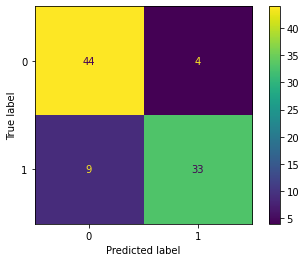

In [ ]:
from sklearn.metrics import plot_confusion_matrix
#Plot confusion matrix
plot_confusion_matrix(logistic, X_test, Y_test)


#b. Have you taken any step to check generalisability of the model? What is that and how it ensures generalisability

In [ ]:
# Use gridsearch
from sklearn.model_selection import GridSearchCV

# parameter grid
parameters = {
    'penalty' : ['l1', 'l2'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

logreg = LogisticRegression()
clf = GridSearchCV(logreg,                       #model
                   param_grid = parameters,      #hyperparameters
                   scoring='accuracy',           #metric for scoring
                   cv=5)                         #number of folds

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge',
'perceptron']
penalty = ['l1', 'l2', 'elasticnet']
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
eta0 = [1, 10, 100]
param_distributions = dict(loss=loss,
penalty=penalty,
alpha=alpha,
learning_rate=learning_rate,
class_weight=class_weight,
eta0=eta0)


sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
random = RandomizedSearchCV(estimator=sgd,
param_distributions=param_distributions,
scoring='roc_auc',
verbose=1, n_jobs=-1,
n_iter=1000)
random_result = random.fit(X_train, Y_train)
print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Score:  0.9213230705221551
Best Params:  {'penalty': 'l1', 'loss': 'hinge', 'learning_rate': 'optimal', 'eta0': 100, 'class_weight': {1: 0.6, 0: 0.4}, 'alpha': 0.001}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


# b What is that and how it ensures generalisability (See answer below)

We will do hyperparameter tuning to get the set of optimal hyperparameters for learning process. We will be using the optimal hyperparameters which improve our model and the generalisability. We see that the accuracy has significantly improved.

# c. Can you design and develop any other model for solving this problem? If so, then why have you used the reported one? Give your justification.

We use naive bayes model because it is very simple. This model does still yield a good classification accurracy.

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train,Y_train)

# Predict Output
predicted = gnb.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
predict_train = gnb.fit(X_train, Y_train).predict(X_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(Y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

print('accuracy_score on test dataset : ', metrics.accuracy_score(Y_test, predicted))

accuracy_score on train dataset :  0.855072463768116
accuracy_score on test dataset :  0.8444444444444444


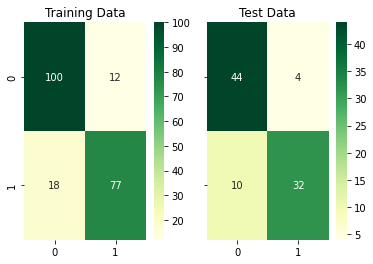

In [ ]:
import seaborn as sns
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix training and test Data
plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,predict_train)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,predicted)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][1]);
a[0][1].set_title('Test Data');

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
#Classification report of naive bayes
print(classification_report(Y_train,predict_train))
print('*'*55)
print(classification_report(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       112
           1       0.87      0.81      0.84        95

    accuracy                           0.86       207
   macro avg       0.86      0.85      0.85       207
weighted avg       0.86      0.86      0.85       207

*******************************************************
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        48
           1       0.89      0.76      0.82        42

    accuracy                           0.84        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90



## 11. Suppose that a company has a number (>=500) of resorts around the globe.
## a. Identify a list of features (>=5) that can be used to describe these resorts.(Please see answer below)

### 1. Location of resort
### 2. price of rooms
### 3. cancellations
### 4. waiting list after booking
### 5. arriving time of guests
### 6. number of babies or children with the guests or in the resort

## b. Create a dataset (rows>=500) and explain all variables. You can generate data either synthetically or collecting from similar datasets. Submit your created dataset. In addition, please provide links in case you have collected the dataset.

## Datafile: Download the dataset (hotel_bookings.csv). The description of the attributes and download of the dataset can be found in this website [link](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)


In [ ]:
data_file_hotel = '/content/hotel_bookings.csv'
# upload and the SCADI data files into a pandas DataFrame.
df_resort= upload_data(data_file_SCADI)
df_resort.name = 'df_resort'
df_resort=(upload_data(data_file_hotel)
                            .pipe(start_pipeline)
                            .pipe(drop_na)
)
df_resort.name = 'df_resort'

### Data atrributes

**Hotel:** Hotel (H1 = Resort Hotel or H2 = City Hotel)

**Country:** Country of origin. Categories are represented in the ISO 3155–3:2013 format

**is_canceled:** Value indicating if the booking was canceled (1) or not (0)

**arrival_date_month:** Month of arrival date

**babies:** Number of babies

**days_in_waiting_list:** Number of days the booking was in the waiting list before it was confirmed to the customer

**adr:** Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

In [ ]:
#Print dataframe 5 rows
print(df_resort.head())
print('#'*100)

#Print the data dimension
print(df_resort.shape)
print('#'*100)

#Filter for resorts only
data_resort = df_resort[(df_resort['hotel'] == 'Resort Hotel')]

#Filter for the five columns we need
df_new = data_resort[['country', 'arrival_date_month', 'babies', 'days_in_waiting_list', 'adr', 'is_canceled']]

# delete rows with missing values
df_new = df_new.dropna()

# Select 500 rows from the dataset
observations = 500

# the dataset for our modelling
df_new = df_new.sample(n = observations, replace=True)

# data dimension
df_new.shape

In [ ]:
# Check missing values in the dataframe
null = pd.DataFrame({'Null Values' : df_new.isna().sum(), 'Percentage Null Values' : (df_new.isna().sum()) / (df_new.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
country,0,0.0
arrival_date_month,0,0.0
babies,0,0.0
days_in_waiting_list,0,0.0
adr,0,0.0
is_canceled,0,0.0


In [ ]:
# Transform categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df_new['country'] = labelencoder.fit_transform(df_new['country'])
df_new['arrival_date_month'] = labelencoder.fit_transform(df_new['arrival_date_month'])

In [ ]:
# The new features after labelencoder
# features
resort_features = df_new.drop('arrival_date_month', axis=1)
target_resort = df_new['arrival_date_month']
print('Features Matrix:\n',resort_features)
print('#'*100)

#Print the data dimension
print(df_new.shape)
print(resort_features.shape)
print(target_resort.shape)
print('#'*100)

# the different target class
unique_resort = df_new['arrival_date_month'].unique()
print(unique_resort)

Features Matrix:
        country  babies  days_in_waiting_list   adr  is_canceled
2879        10       0                     0  48.0            0
18233        1       0                     0  36.0            0
18628       13       0                     0  34.2            0
2867         7       0                     0  48.0            0
2953         6       0                     0  36.0            0
...        ...     ...                   ...   ...          ...
18284        6       0                     0  36.0            0
14398       13       0                     0  35.1            0
18316        0       0                     0  52.2            0
30628       13       0                     0  43.0            0
18270       14       0                     0  48.0            0

[500 rows x 5 columns]
####################################################################################################
(500, 6)
(500, 5)
(500,)
################################################################

# c. Build a ML model that can help a customer to select appropriate set of resorts based on the season of travel. Present and describe the performance of your model.

In [ ]:
#Split data into training data and test data
Resort_X_train,Resort_X_test,Resort_Y_train,Resort_Y_test = train_test_split(resort_features,target_resort,test_size=0.3,random_state=0)

#check for distribution of target
print(Resort_Y_train.value_counts(normalize=True))
print(Resort_Y_train.value_counts())
print('*'*50)
print(Resort_Y_test.value_counts(normalize=True))
print(Resort_Y_test.value_counts())
print('*'*50)
print('We dedicate 30% of the initial data to test data and 70% is for training data to train the model')

8     0.780000
9     0.045714
3     0.037143
7     0.034286
6     0.031429
4     0.025714
1     0.014286
5     0.011429
10    0.008571
0     0.008571
2     0.002857
Name: arrival_date_month, dtype: float64
8     273
9      16
3      13
7      12
6      11
4       9
1       5
5       4
10      3
0       3
2       1
Name: arrival_date_month, dtype: int64
**************************************************
8     0.760000
9     0.080000
7     0.053333
3     0.033333
1     0.026667
6     0.013333
5     0.013333
4     0.013333
10    0.006667
Name: arrival_date_month, dtype: float64
8     114
9      12
7       8
3       5
1       4
6       2
5       2
4       2
10      1
Name: arrival_date_month, dtype: int64
**************************************************
We dedicate 30% of the initial data to test data and 70% is for training data to train the model


In [ ]:
#Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(Resort_X_train,Resort_Y_train)

# Predict Output
predicted = gnb.predict(Resort_X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
predict_train = gnb.fit(Resort_X_train, Resort_Y_train).predict(Resort_X_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(Resort_Y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

print('accuracy_score on test dataset : ', metrics.accuracy_score(Resort_Y_test, predicted))

accuracy_score on train dataset :  0.21428571428571427
accuracy_score on test dataset :  0.14


# How can we improve this model? (See Answer Below)


The target class is imbalanced therefore we can group them into quarterly for seasonality. January - April, May - August, September - December. The above accurracy is very poor.

# d. Why do we need a ML model for this problem?

This is a classification problem, we are classifying the data in order for the customer to make the right decision. The customer can choose to go to a resort in the months that are price lower. So knowing when the price is lower, waiting time for booking is less or when there is less babies the customer can decide. In this case the customer could be a single person who want a resort that is silent and not family orientated.